# Verteilungen
Statistische Verteilungen: Beispiele, Numpy Funktionen, Anwendungen
*"neues" Packet* scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Um die Verteilungsfunktionen zu berechnen nutzen wir ein weiteres python packet aus der scipy Bibliothek

In [2]:
import scipy, scipy.stats

Um die Normalverteilung zu plotten wollen wir die Wahrscheinlichkeitsdichtefunktion (probability density function, pdf) an verschiedenen Stellen auswerten und mit *pyplot* plotten. 

Mit Hilfe von der scipy Funktion linespace erstelle ich mir eine Liste an Werten. Diese nutze ich als Werte auf der x-Achse, an denen ich die *pdf* auswerten will. 

*Elegante Lösung*: Zur Darstellung der Wahrscheinlichkeitsdichtefunktion werte ich die Funktion an bestimmten x-Werten aus. Diese könnte ich einfach definieren, aber im Zweifel weiß ich nicht wo auf der x-Achse der relevante Teil der Wahrscheinlichkeitsdichtefunktion liegt.
Um dieses Problem elegant zu umgehen, kann ich die *ppf* (Percent point function) nutzen. Diese ist die Umkehrfunktion der *cdf* (comulative density function). Wenn ich diese am "Anfang" (also bei 1% der Masse) und am "Ende" (also bei 99% der Masse) auswerte, bekomme ich die Intervallgrenzen innerhalb derer sich fast alles abspielt. Ich muss also kein geeignetes Interval suchen!

In [3]:
lower = scipy.stats.norm.ppf(0.001,0,1)
upper = scipy.stats.norm.ppf(0.999,0,1)
x = scipy.linspace(lower,upper,100)

Dann berechne ich die pdf an den in **x** gespeicherten Stellen wie folgt

In [4]:
y = scipy.stats.norm.pdf(x,0,1)

Und plotte die Werte

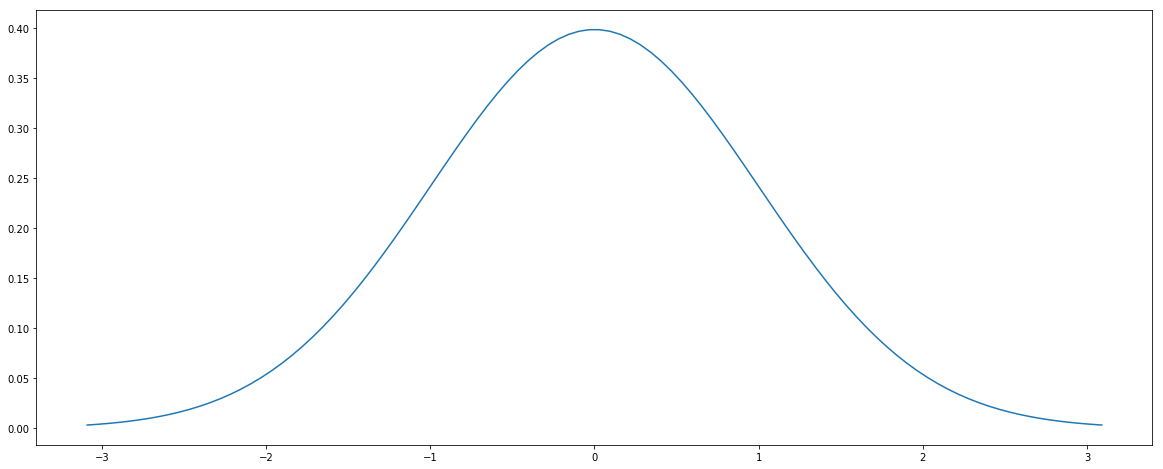

In [5]:
plt.figure(1,figsize=(20, 8))
plt.plot(x,y);

Wenn ich Werte einer Zufallsvariablen die einer Bestimmten Verteilung folgt ziehen will, kann ich das einfach mit *numpy* machen:

In [6]:
np.random.normal(0,1,10)

array([ 2.69996832, -1.13283871,  0.17777912,  1.26470936,  0.55316624,
        2.50186524, -0.33420853,  0.04967598,  0.85785563, -1.53188514])

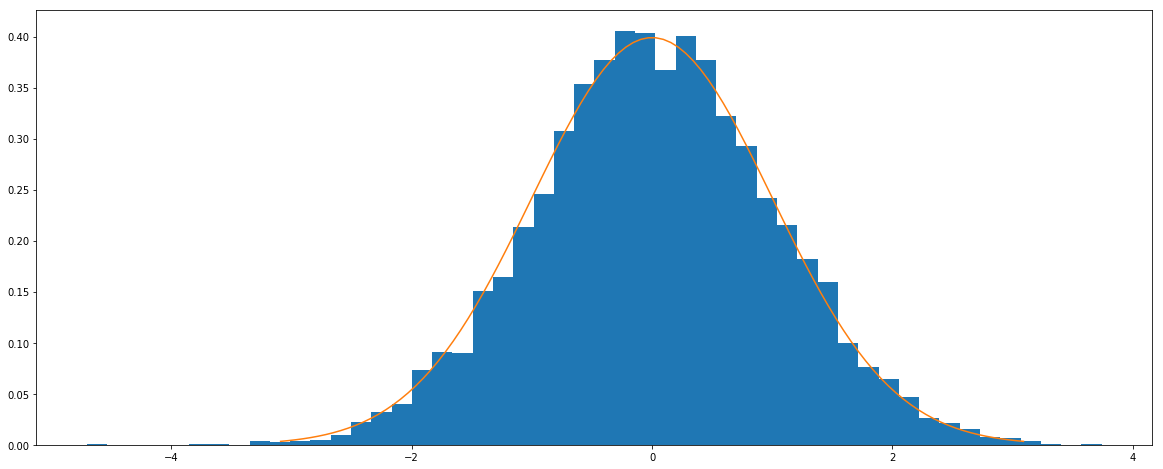

In [7]:
n = 10000 # mit steigendem n nähert sich das Histogram an die mathematische Dichtefunktion an
rv = np.random.normal(0,1,n)

plt.figure(1, figsize=(20, 8))
plt.hist(rv, 50,density=True)
plt.plot(x, y)
plt.show();

---

## Bernoulliverteilung

Im Falle einer diskreten Verteilung spricht man von einer Massefunktion, deshalb *pmf*

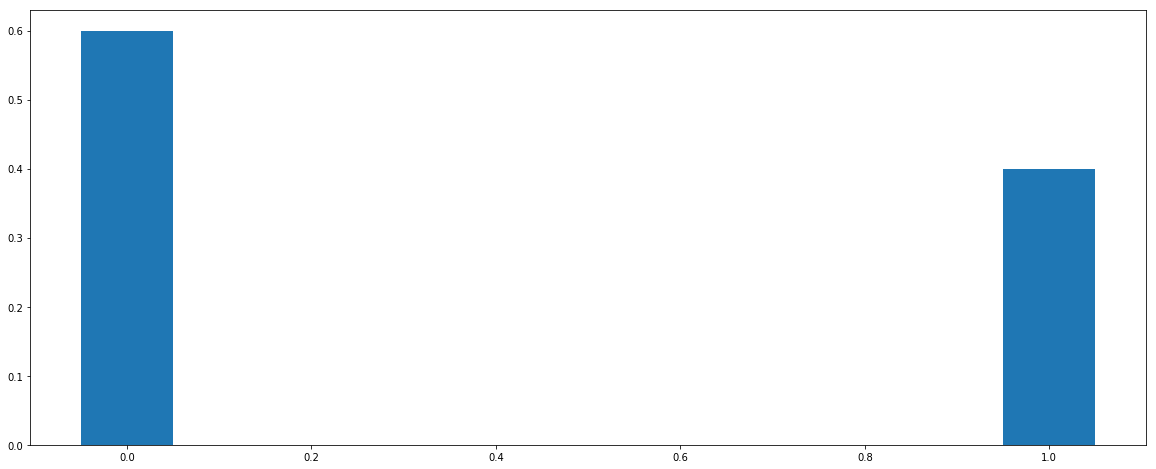

In [8]:
p = 0.4
x = np.array([0.,1.])

plt.figure(1, figsize=(20, 8))
plt.bar(x, scipy.stats.bernoulli.pmf(x, p), 0.1);

In [9]:
np.random.binomial(1, p, 10)

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

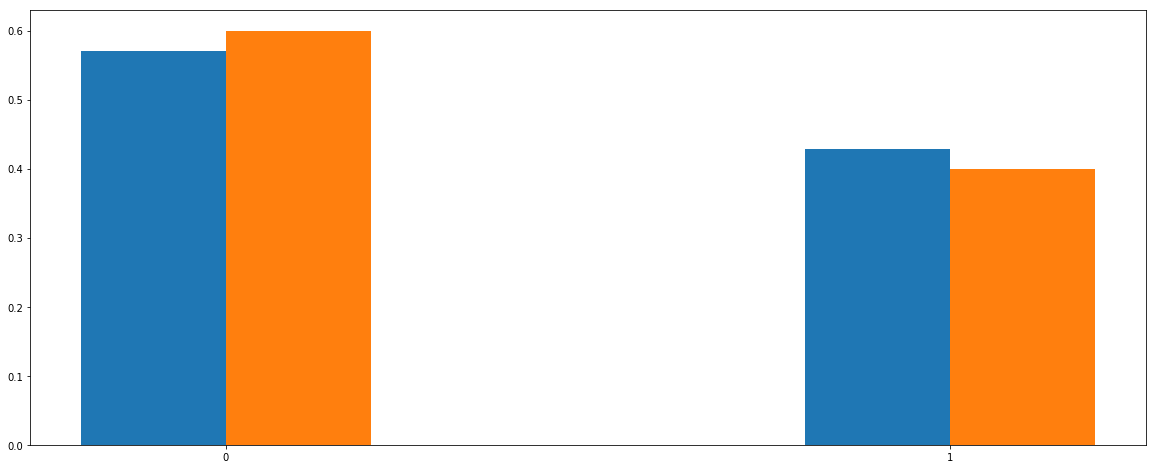

In [10]:
n = 10000 # mit steigendem n nähert sich das Histogram an die mathematische Dichtefunktion an
rv = np.random.binomial(1, p, 1000)

y_rand = [float(rv.size - rv.sum()) / rv.size, float(rv.sum()) / rv.size]
y_math = scipy.stats.bernoulli.pmf(x, p)

plt.figure(1, figsize=(20, 8))
plt.xticks([0,1]) # setzt die x-Achsen Abschnitte auf 0 und 1
plt.bar(x-0.1, y_rand, align='center', width=0.2)
plt.bar(x+0.1, y_math, align='center', width=0.2)

plt.show();